# Probability and Statistics Refresher

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
# import libraries
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import slideUtilities as sl
from importlib import reload
from datetime import datetime
from IPython.display import Image
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML
print('')

In [2]:
%%html
<style>
 .container.slides .celltoolbar, .container.slides .hide-in-slideshow {
    display: None ! important;
}
</style>

Today we'll review the essentials of probability and statistics.  Given the prerequisites for this course, I assume that you learned all of this once.  What I want to do today is bring the material back into your mind fresh.

## Probability

What is probability?  

Historically, the notion of probability has actually been very slippery and hard to pin down exactly.   There are probably at least three ways to view probability in practice:

1. as a mathematical exercise involving positive functions that integrate to 1 (i.e., distributions).
2. as an encoding of natural rules for reasoning under uncertainty. 
3. as an idealization of properties of data and processes.

For our purposes, we use probability as an abstraction that hides details we don't want to deal with.  This is a time-honored use of probability.

>Any simple idea is approximate; as an illustration, consider an object ... what is an object? Philosophers are always 
>saying, “Well, just take a chair for example.” The moment they say that, you know that they do not know what they are 
>talking about any more. What is a chair? ... every object is a mixture of a lot of things, so we can deal with it 
> only as a series of approximations and idealizations.

>The trick is the idealizations.

Richard Feynman, _The Feynman Lectures on Physics, 12-2_

Here is an illustration of this principle applied to probability:

>In a serious work ... an expression such as “this phenomenon is due to chance” constitutes simply, 
>an elliptic form of speech. ... It really means “everything occurs as if this phenomenon were due to chance,” 
>or, to be more precise: “To describe, or interpret or formalize this phenomenon, 
>only probabilistic models have so far given good results.”

Georges Matheron, _Estimating and Choosing: An Essay on Probability in Practice_

### Probability and Conditioning

__Definition.__  Consider a set $\Omega$, referred to as the
_sample space._  A _probability
  measure_ on $\Omega$ is a function $P[\cdot]$ defined on all the subsets of $\Omega$ (the
  _events_) such that:
  
1. $P[\Omega] = 1$
2. For any event $A \subset \Omega$, $P[A] \geq 0.$
3. For any events $A, B \subset \Omega$ where $A \cap B =
    \emptyset$, $P[A \cup B] = P[A] + P[B]$.



Often we want to ask how a probability measure changes if we restrict the sample space to be some subset of $\Omega$.  

This is called __conditioning.__

__Definition.__ The _conditional probability_ of an event $A$ given that
event $B$ (having positive probability) is known to occur, is 

$$ P[A|B] = \frac{P[A \cap B]}{P[B]}  \mbox{ where } P[B] > 0 $$

The function $P[\cdot|B]$ is a probability measure over the sample space
$B$.  

Note that in the expression $P[A|B]$, $A$ is random but $B$ is fixed. 

Now if $B$ is a proper subset of $\Omega,$ then $P[B] < 1$.   So $P[\cdot|B]$ is a rescaling of the quantity $P[A\cap B]$ so that $P[B|B] = 1.$ 

The sample space $\Omega$ may be continuous or discrete, and bounded or unbounded.

__Independent Events.__

__Definition.__ Two events $A$ and $B$ are __independent__ if $P[A\cap B] = P[A] \cdot P[B].$

This is exactly the same as saying that $P[A|B] = P[A].$  

So we can see that the intuitive notion of independence is that "if one event occurs, that does not change the probability of the other event."

## Random Variables

We are usually interested in numeric values associated with events.  

When a random event has a numeric value we refer to it as a random variable.

Notationally, we use CAPITAL LETTERS for random variables and lowercase for non-random quantities.

To collect information about what values of the random variable are more probable than others, we have some more definitions.

__Definition.__ The cumulative distribution function (CDF) F for a random
 variable $X$ is equal to the probability measure for the event that
 consists of all possible outcomes with a value of the random variable $X$
 less than or equal to $x$, that is, $F(x) = P[X \leq x].$

__Example.__  Consider the roll of a single die.  The random variable here is the number of points showing.  What is the CDF?

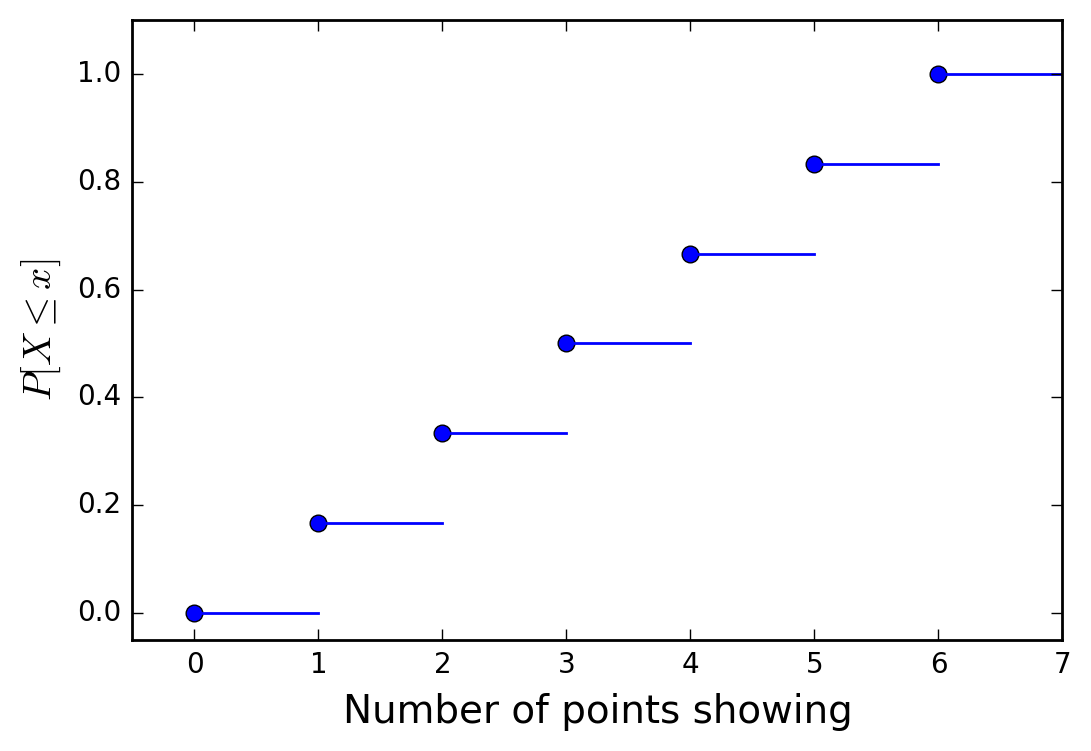

In [3]:
sl.hide_code_in_slideshow()
plt.figure()
for i in range(7):
    plt.plot(i,i/6.,'ob')
    plt.plot([i,i+1],[i/6.,i/6.],'-b')
plt.xlim([-0.5,7])
plt.ylim([-0.05,1.1])
plt.xlabel('Number of points showing',size=14)
plt.ylabel(r'$P[X\leq x]$',size=14)
print('')

Now, consider this CDF of some random variable:

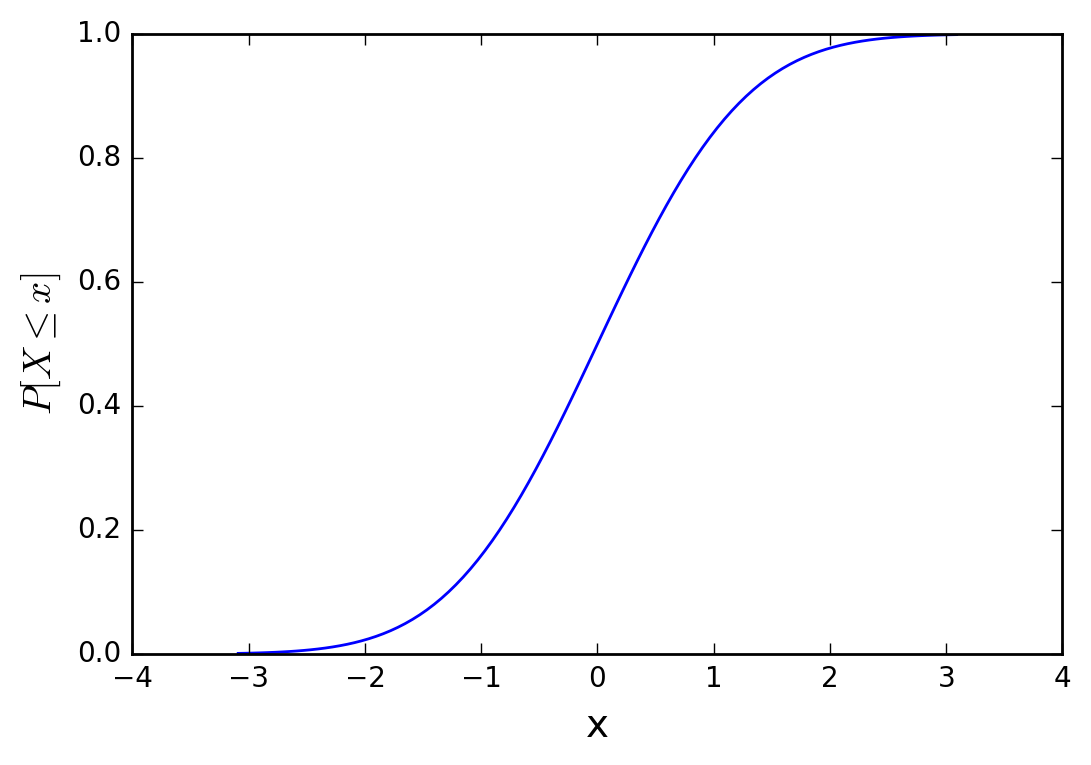

In [4]:
sl.hide_code_in_slideshow()
from scipy.stats import norm
plt.figure()
x = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 100)
plt.plot(x, norm.cdf(x),'b-')
plt.xlabel('x',size=14)
plt.ylabel(r'$P[X\leq x]$',size=14)
print('')

What does it mean when the slope is steeper for some $x$ values?

The slope tells us how likely values are in a particular range.

This is important enough that we define a function to capture it.  

__Definition.__ The _probability density function_ (pdf) is the derivative of the CDF, when that is defined.

$$ f(x) = \frac{dF(x)}{dx}.$$

Often we will go the other way as well:

$$ F(x) = \int_{-\infty}^{x} f(t)\; dt $$

You should be able to see that:

$$ \int_{-\infty}^{+\infty} f(x)\; dx = 1 $$

and

$$      f(x) \geq 0 $$

Now, for a discrete random variable, the CDF is not differentiable (because the CDF is a step function).  

For the PDF of discrete RVs, we simply plot the probability function of
each value.  That is, we plot $P[X = x]$ for the various values of $x$.

Another way to think of the PDF is that it consists of impulses at the
points of discontinuity of the CDF. 

For our example of the single die:

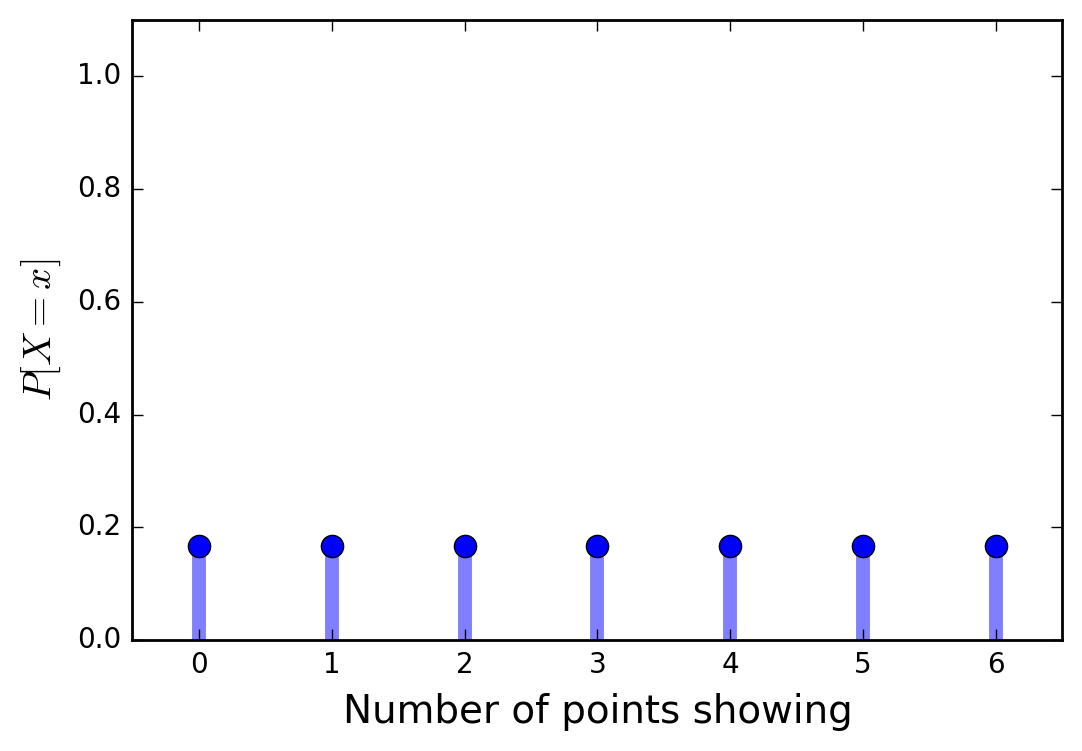

In [5]:
sl.hide_code_in_slideshow()
plt.figure()
x = np.arange(7)
plt.plot(x, 7*[1/6.], 'bo', ms=8)
plt.vlines(x, 0, 1/6., colors='b', lw=5, alpha=0.5)
plt.xlim([-0.5,6.5])
plt.ylim([0,1.1])
plt.xlabel('Number of points showing',size=14)
plt.ylabel(r'$P[X = x]$',size=14)
print('')

## Characterizing Random Variables

__Definition.__ The _expected value_ $E[X]$ of a random
variable $X$ is the probability-weighted sum or integral of all possible values of
the R.V.  

For a discrete random variable, this is:

$$ E[K] \equiv \sum_{-\infty}^{+\infty} k\; P[K=k] $$

and for a continuous random variable with pdf $p():$

$$ E[K] \equiv \int_{-\infty}^{+\infty} k\; p(k)\; dk $$

The expected value is also called the average or the mean, although we
prefer to reserve those terms for empirical statistics (actual
measurements, not idealizations like these formulas).

The expected value is in some sense the "center of mass" of the random
variable.   It is often denoted $\mu$.

The mean is usually a quite useful characterization of the random variable.

However, be careful: in some cases, the mean may not be very informative, or important.  

In some cases a
random variable may not ever take on the mean as a possible value.  (Consider again the single die, whose mean is 3.5)

In other cases the notion of average isn't useful, as for the person
with their head in the oven and feet in the freezer who claims "on
average I feel fine." 

In other words, the mean may not be very informative when
observations are highly variable.   

In fact, the variability of random quantities is crucially important to characterize.

For this we use __variance,__ the mean squared difference of the random variable from its mean.

__Definition.__ The variance of a random variable $X$ is

$$ Var(X) \equiv E[(X - E[X])^2]$$.

For a discrete R.V. with $E[X] = \mu$ this would be:
$$ Var(X) = \sum_{x=-\infty}^{+\infty} (x-\mu)^2\; P[X=x]. $$

The units of variance are the square of the units of the mean. 

To compare variance and mean, we take the square root of the variance.

This is called the __standard deviation__ and is denoted $\sigma$.
So variance is denoted $\sigma^2$.

Next, let's recall the case of the Tesla and Yelp returns from the last lecture:

In [6]:
sl.hide_code_in_slideshow()
import pandas as pd
import pandas_datareader.data as web

stocks = ['TSLA', 'YELP']
attr = 'Close'
data_source = 'yahoo'
df = web.DataReader(stocks, 
                    data_source,                               
                    start=datetime(2014, 1, 1), 
                    end=datetime(2014, 12, 31))[attr]
rets = df.pct_change(30)
rets.TSLA.plot(label = 'tesla')
rets.YELP.plot(label = 'yelp')
plt.legend(loc='best')

/Users/markcrovella/anaconda/lib/python3.5/site-packages/pandas_datareader/base.py:192: SymbolWarning: Failed to read symbol: 'TSLA', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/Users/markcrovella/anaconda/lib/python3.5/site-packages/pandas_datareader/base.py:192: SymbolWarning: Failed to read symbol: 'YELP', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


RemoteDataError: No data fetched using 'YahooDailyReader'

Treating these two timeseries as random variables, we are interested in how the vary __together__.

This is captured by the concept of __covariance.__

__Definition.__ For two random variables $X$ and $Y$, their _covariance_ is defined as:

$$\text{Cov}(X,Y) = E\left[(X-\mu_X)(Y-\mu_Y)\right]$$

Basically, covariance is large when $X$ and $Y$ tend to be both above their means together, and both below their means together.

## Low and High Variability

Historically, most sources of random variation that have concerned
statisticians are instances of low variability.  

The original roots of
probability in the study of games of chance, and later in the study of
biology and medicine, have mainly studied objects with low variability.

(Note that by "low variability" I don't mean that such variability is unimportant.)

Some examples of random variation in this category are: 

* the heights of adult humans
* the number of trees per unit area in a mature forest
* the sum of 10 rolls of a die
* the time between emission of subatomic particles from a radioactive material.

In each of these cases, there are a range of values that are
 "typical," and there is a clear threshold above what is typical, that essentially never occurs.


On the other hand, there are some situations in which variability is
quite different.  

In these cases, there is no real "typical" range of
values, and arbitrarily large values can occur with non-negligible
frequency.   

Some examples in this category are

* the distribution of wealth among individuals in society
* the sizes of human settlements
* the areas burnt in forest fires
* the runs of gains and losses in various financial markets over time
* and the number of collaborators a scholar has over her lifetime.   

> The banking system (betting against rare events) just lost [more than] 1
> Trillion dollars (so far) on a single error, more than was ever earned
> in the history of banking.

Nassim Nicholas Taleb, September 2008 





![](figs/derivatives-portfolio-variation.png)

An example of a run of observations showing high variability.   This figure shows the daily
variations in a derivatives portfolio over the timeframe 1988-2008.
About 99% of the variation over the 20 years occurs in a single day
(the day the European Monetary System collapsed).


## Important Random Variables

### Independent Trials

Here is our canonical experiment: flipping a weighted coin.  

The coin
comes up "heads" (aka "success") with probability $p$.  

We use the standard notation that the corresponding probability ("tails", "failure") is denoted $q$
(i.e., $q = 1-p$).  

These are called _Bernoulli trials_; one can think of each trial as a timestep so these are about _discrete
  time_.
  
Notice that by definition, Bernoulli trials are __independent events.__

Now we will extend this notion to continuous time.

Imagine that you "speed up" the coin flipping so that instead of flipping a coin once per second,
you flip it $m$ times per second, and you simultaneously decrease the
probability of success to $p/m$.   

Then you expect the same number of
events (successes, heads) per second (i.e., $p$), but events can happen at finer time
intervals.   

Now imagine the limit as $m \rightarrow \infty$.  

This is a
mathematical abstraction in which 
* an event can happen at _any_ time instant
* an event at any time instant is equally likely
* and an event at any time instant is independent of any other time instant (it's still a coin with no memory).   

Now we can think of events happening at some _rate_ $\lambda$ that is
equal to $p$ per second.  

Note that $\lambda$ has units of inverse time, e.g., sec$^{-1}$. 

For each of these two cases (discrete and continuous time) there are two questions we can ask:

1. Given that an event has just occured, how long until the next
  success?
2. In a fixed number of trials or amount of time, how many events
  occur?


These four cases define four commonly-used random variables.




| | # Trials or Time Until Event | Number of Events in Fixed Time  |
|-|:--:|:--:|
|__Discrete Trials__| Geometric| Binomial |
|__Continuous Rate__| Exponential | Poisson|

Each one has an associated distribution.

#### The Geometric Distribution

The geometric distribution answers the question: "what is the probability there are exactly $k$ trials before the first success?"

Its PDF is given by:

$$ P[X = k] = p(1-p)^k. $$ 

Its mean is $\mu = \frac{1-p}{p}$ and its variance is $\sigma^2 = \frac{1-p}{p^2}$.

Its pdf looks like:

In [ ]:
sl.hide_code_in_slideshow()
from scipy.stats import geom
p = 0.3
x = np.arange(geom.ppf(0.01, p), geom.ppf(0.995, p))
plt.ylim([0,0.4])
plt.xlim([-0.5,max(x)])
plt.plot(x-1, geom.pmf(x, p), 'bo', ms=8, label='geom pmf')
plt.vlines(x-1, 0, geom.pmf(x, p), colors='b', lw=5, alpha=0.5)
plt.title('Geometric PDF.  p = 0.3',size=14)
plt.xlabel(r'k',size=14)
plt.ylabel(r'P[X = k]',size=14)
print('')

#### The Binomial Distribution

In this experiment there are precisely $N$ coin flips, and $p$ is still
the probability of a success.  Now we ask: what is the probability there
will be $k$ successes?

For any given sequence of $k$ successes and $N-k$ failures, the probability is $p^k (1-p)^{N-k}$.

But there are many different such sequences: $C^N_k$ of them in fact.

So this distribution is $P[X=k] = C^N_k p^k (1-p)^{N-k}.$

Its mean is $pN$, and its variance is $pqN$.  

In [ ]:
sl.hide_code_in_slideshow()
from scipy.stats import binom
p = 0.3
x = np.arange(binom.ppf(0.01, 10, p), binom.ppf(0.9995, 10, p))
plt.ylim([0,0.4])
plt.xlim([-0.5,max(x)+0.5])
plt.plot(x, binom.pmf(x, 10, p), 'bo', ms=8, label='binom pmf')
plt.vlines(x, 0, binom.pmf(x, 10, p), colors='b', lw=5, alpha=0.5)
plt.title('Binomial PDF.  p = 0.3, N = 10',size=14)
plt.xlabel(r'k',size=14)
plt.ylabel(r'P[X = k]',size=14)
print('')

#### The Exponential Distribution

This random variable is the analog of the geometric in the continuous case,
_i.e.,_ the situation in which a success happens at some rate
$\lambda$.  This RV measures the time until a success occurs. 

Its pdf is:

$$ p(x) = \lambda e^{- \lambda x}$$

The mean is $1/\lambda$, and the variance is $1/\lambda^2$.

In [ ]:
sl.hide_code_in_slideshow()
from scipy.stats import expon
p = 0.3
x = np.linspace(expon.ppf(0.01,scale=1/0.3), expon.ppf(0.995,scale=1/0.3), 100)
plt.plot(x, expon.pdf(x,scale=1/0.3),'b-', lw=5, alpha=0.6, label='expon pdf')
plt.title(r'Exponential PDF.  $\lambda$ = 0.3',size=14)
plt.xlabel(r'x',size=14)
plt.ylabel(r'p(x)',size=14)
plt.ylim([0,0.4])
plt.xlim(xmax=14)
print('')

#### The Poisson Distribution

The Poisson Distribution is the limiting form of binomial, when the
number of trials goes to infinity, happening at some rate $\lambda$.

$$ P[k \mbox{ successes in time } T] = (\lambda T)^k \frac{e^{- \lambda T}}{k!}$$

It answers the question: when events happen indepdently at some fixed rate, how many will occur in a given fixed interval?

Its mean is $\lambda T$ and its variance is $\lambda T$ as well.

In [ ]:
sl.hide_code_in_slideshow()
from scipy.stats import poisson
mu = 3
x = np.arange(poisson.ppf(0.01, mu), poisson.ppf(0.9995, mu))
# plt.ylim([0,1])
plt.xlim([-0.5,max(x)+0.5])
plt.ylim(ymax=0.4)
plt.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
plt.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
plt.title('Poisson PDF.  $\lambda T$ = {}'.format(mu),size=14)
plt.xlabel(r'k',size=14)
plt.ylabel(r'P[X = k]',size=14)
print('')

The Poisson distribution has an interesting role in our perception of randomness (which you can read more about [here](http://www.empiricalzeal.com/2012/12/21/what-does-randomness-look-like/#more-2450)).    

The classic example comes from history.  From the above site:

>In 1898 Ladislaus Bortkiewicz, a Russian statistician of Polish descent, was trying to understand why, in some years, 
>an unusually large number of soldiers in the Prussian army were dying due to horse-kicks. In a single army corp, 
>there were sometimes 4 such deaths in a single year. Was this just coincidence?

To assess whether horse-kicks were random (not following any pattern) Bortkiewicz simply compared the number per year to what would be predicted by the Poisson distribution.

In [ ]:
sl.hide_code_in_slideshow()
horse_kicks = pd.DataFrame(
data = np.array([
[0, 108.67, 109],
[1, 66.29, 65],
[2, 20.22, 22],
[3, 4.11, 3],
[4, 0.63, 1],
[5, 0.08, 0],
[6, 0.01, 0]]),
columns = ["Number of Deaths Per Year","Predicted Instances (Poisson)","Observed Instances"])
horse_kicks

In [ ]:
sl.hide_code_in_slideshow()
horse_kicks[["Predicted Instances (Poisson)","Observed Instances"]].plot.bar()
plt.xlabel("Number of Deaths Per Year",size=14)
plt.ylabel("Count",size=14)
print('')

The message here is that when events occur at random, we actually tend to perceive them as clustered.   

Here is another example:

![](figs/pinker-glow-worms-and-stars-plot.jpg)

Which of these was generated by a random process ocurring equally likely everywhere?

These images are from Steven Pinker’s book, _The Better Angels of our Nature._

In the left figure, the number of dots falling into regions of a given size follows the Poisson distribution.

#### The Uniform Distribution

The uniform distribution models the case in which all outcomes are equally probable.  

It can be a discrete or continuous distribution.

We have already seen the uniform distribution in the case of rolls of a fair die:

In [ ]:
sl.hide_code_in_slideshow()
plt.figure()
x = np.arange(7)
plt.plot(x, 7*[1/6.], 'bo', ms=8)
plt.vlines(x, 0, 1/6., colors='b', lw=5, alpha=0.5)
plt.xlim([-0.5,6.5])
plt.ylim([0,1.1])
plt.xlabel('Number of points showing',size=14)
plt.ylabel(r'$P[X = x]$',size=14)
print('')

There is an important relationship between the uniform and Poisson distributions.

__When the time an event occurs is uniformly distributed, the number of events in a time interval is Poisson distributed.__

You can replace "time" with "location", and so on.

Also, the reverse statment is true as well.

So a simple way to generate a picture like the scattered points above is to select the $x$ and $y$ coordinates of each point uniformly distributed over the picture size.

#### The Gaussian Distribution

The Gaussian Distribution is also called the Normal Distribution.

We will make __extensive__ use of Gaussian distribution, for a number of reasons.

One of reasons we will use it so much is that it is a good guess for how errors are distributed in data.

This comes from the celebrated __Central Limit Theorem__.   Informally, 

>_The sum of a large number of independent observations from any
>distribution with finite variance tends to have a Gaussian
> distribution._

As a special case, the sum of $n$ independent Gaussian variates is Gaussian.
Thus Gaussian processes remain Gaussian after passing through linear
systems.   

If $X_1$ and $X_2$ are Gaussian, then $X_3 = aX_2 + bX_3$ is Gaussian.

Thus we can see that one way of thinking of the Gaussian is that it is the
limit of the Binomial when $n$ is large, that is, the limit of
the sum of many Bernoulli trials.    However many other
sums of random variables (not just Bernoulli trials) converge to the
Gaussian as well.

The _standard Gaussian_ distribution has mean zero and a variance (and standard deviation)
of 1.   The pdf of the standard Gaussian is:

$$ p(x) = \frac{1}{\sqrt{2 \pi}} e^{-x^2/2}. $$

For an arbitrary Gaussian distribution with mean $\mu$ and variance
$\sigma^2$, the pdf is simply the standard Gaussian that is relocated to
have its center at $\mu$ and its width scaled by $\sigma$:

$$ p_{\mu,\sigma}(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}. $$

In [ ]:
sl.hide_code_in_slideshow()
from scipy.stats import norm
plt.figure()
x = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 100)
plt.plot(x, norm.pdf(x),'b-')
plt.title(r'Standard Gaussian PDF.  $\mu = 0, \sigma = 1$',size=14)
plt.xlabel('x',size=14)
plt.ylabel(r'$p(x)$',size=14)
print('')

In [ ]:
sl.hide_code_in_slideshow()
plt.figure()
x = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 100)
plt.plot(x, norm.cdf(x),'b-')
plt.title(r'Standard Gaussian CDF.  $\mu = 0, \sigma = 1$',size=14)
plt.xlabel('x',size=14)
plt.ylabel(r'$P[X\leq x]$',size=14)
print('')

### Heavy Tails

Earlier we discussed high- and low-variability.   

All of the distributions we have discussed so far have "light tails", meaning that they show low variability.

In other words, extremely large observations are essentially impossible.

However in other cases, extremely large observations can occur.   Distributions that capture this property are called "heavy tailed".

Some examples of data that can be often modeled using heavy-tailed distributions:

* The sizes of files in a file system
* The sizes of objects transferred over the Internet
* The execution time of jobs on a computer system
* The degree of nodes in a network (eg, social network).

In practice, random variables that follow heavy tailed distributions
are characterized as exhibiting many small observations mixed in with
a few large observations.  

In such datasets, most of the observations
are small, but most of the contribution to the sample mean or variance
comes from the rare, large observations.

#### The Pareto Distribution

The Pareto distribution is the simplest continuous heavy-tailed
distribution.    

Pareto was an Italian economist who studied income distributions.
(In fact, income distributions typically show heavy tails.)

Its pdf is:

$$ p(x) = \alpha k^{\alpha} x^{-\alpha-1}\;\;\; k \leq x,\; \;0 < \alpha
\leq 2. $$

It takes on values in the range $[k, \infty]$. 


In [ ]:
sl.hide_code_in_slideshow()
from scipy.stats import pareto
alpha = 1.3
x = np.linspace(pareto.ppf(0.005,alpha), pareto.ppf(0.995,alpha), 100)
plt.plot(x, pareto.pdf(x,alpha),'b-', lw=5, alpha=0.6, label='pareto pdf')
plt.title(r'Pareto PDF.  $\alpha$ = {}'.format(alpha),size=14)
plt.xlabel(r'x',size=14)
plt.ylabel(r'p(x)',size=14)
print('')

The variance of the Pareto distribution is infinite.  (The corresponding
integral diverges.)

In practice, this means that a new observation that significantly
changes the sample variance is _always_ possible, no matter how many samples
of the random variable have already been taken.

The mean of the Pareto is $\frac{k\alpha}{\alpha-1}$, for $\alpha > 1$.  

But
note that as $\alpha$ decreases, the variability of the Pareto
increases.  

In fact, for $\alpha \leq 1$, the Pareto distribution has
_infinite mean._  Again, in practice this means that a swamping
observation for the mean is always possible.   

Hence the running average
of a series of Pareto observations with $\alpha \leq 1$ will never
converge to a fixed value, and the mean itself is not a useful
statistic in this case.

## Statistics

Statistics: "The collection, analysis, interpretation, and presentation of masses of data."

### Bayes' Rule

Bayes' Rule is a simple way of manipulating conditional probabilities in a way that can be very useful.

Start with a situation in which we are interested in two events, $A_1$ and $A_2$.  These are exhaustive, meaning that in any experiment either $A_1$ or $A_2$ must occur. (They form a partition of $\Omega$.)

Now:

$$ P[A_1|B] = \frac{P[A_1 \cap B]}{P[B]}$$

$$ = \frac{P[A_1 \cap B]}{P[B|A_1] + P[B|A_2]}$$

$$ = \frac{P[B|A_1]\,P[A_1]}{P[B|A_1] + P[B|A_2]}$$

(This is easy to extend to the case where $A_1, A_2, ..., A_n$ form a partition of $\Omega$.)

This formula is useful because often the probabilities $P[B|A_i]$ can be
estimated, while the probabilties $P[A_i|B]$ may be hard to estimate.

We interpret this transformation as updating our estimate of the probability of each $A_i$
based on new information, namely, that $B$ is true.   

This update
transforms the __prior__ probabilities $P[A_i]$ into the 
__posterior__ probabilities $P[A_i|B]$.


__Example.__

Empirical evidence suggests that amongs sets of twins,
about 1/3 are identical.  

Assume therefore that probability of a pair of
twins being identical to be 1/3.  

Now, consider how a couple might
update this probability after they get an ultrasound that shows that the
twins are of the same gender.   

What is their new estimate of the
probability that their twins are identical?

Let $I$ be the event that the twins are identical.  Let $G$ be the event
that gender is the same via ultrasound.  

The prior probabilities here
is $P[I]$.

What we want to calculate is the
posterior probability $P[I\,|\,G]$.

First, we note:

$$P[G\,|\,I] = 1 $$

(Surprisingly, people are sometimes confused about that fact!)   

Note that this conditional probability is easy to estimate.

Also,
we assume that if the twins are not identical, they are like any two
siblings, _i.e.,_ their probability of being same gender is 1/2: 

$$P[G\,|\,\bar{I}] = 1/2 $$

Again, easy to estimate.

And we know from observing the population at large that among all sets
of twins, about 1/3 are identical:

$$ P[I] = 1/3 $$

Note that this statistic is easy to obtain from data.

Then:

$$ P[I\,|\,G] = \frac{P[G\,|\,I]\; P[I]}{P[G\,|\,I]\,P[I] + P[G\,|\,\bar{I}]\,P[\bar{I}]} $$

$$ = \frac{1 \cdot 1/3}{(1 \cdot 1/3) + (1/2 \cdot 2/3)} = \frac{1}{2}$$

So we have updated our estimate of the twins being identical from 1/3
(prior probability) to 1/2 (posterior probability).

We did this in a way that used quantities that were relatively easy to obtain or measure.

### Confidence Intervals

Say you are concerned with some data that we take as coming from a random process.

You want to characterize it as accurately as possible.   You measure it, yielding a
single value.  

How much does that value tell you?   Can you rely on it as a description of the random process?

Let's say you have a dataset and you compute its average value.   

How certain are you that the average would be the same if you took another dataset from the same source (i.e., the same random process)?

We think of the hypothetical data source as a random variable with a true mean $\mu$.

We would like to find a range within which we are 90% sure that the
true mean $\mu$ lies.  

In other words, we want the probability that the true mean lies in
the interval to be 0.9.  This interval is then called the 90% confidence interval.

To be more precise:  A confidence interval at level $\gamma$ for a fixed
but unknown parameter $m$ is an interval $(a,b)$ such that

$$ P[a < m < b] \geq \gamma. $$

Note that $m$ is fixed --- it is not random.  What is random is the
interval $(a, b)$.  This interval is constructed based on the
data, which (by assumption) are random.

![](figs/confidence-intervals.png)

### Confidence Intervals for the Mean

Imagine we have a set of $n$ samples of a random variable,
$x_1, x_2, ..., x_n$ Let's assume that the random variable has mean
$\mu$ and variance $\sigma^2$.

An estimate of $\mu$ is the empirical average of the samples, $\bar{x}$.   

Now, the Central Limit Theorem tells us that the sum of a
large number $n$ of random variables, each with mean $\mu$ and variance
$\sigma^2$, yields a Gaussian random variable with mean
$n\mu$ and variance $n \sigma^2$.   So the distribution of the average
would be normal with mean $\mu$ and variance $\sigma^2 / n$.  That
is, 

$$ \bar{x} \sim N(\mu, \sigma/\sqrt{n}) $$

We usually assume that the number of samples should be 30 or more for
the CLT to hold.   While the specific value 30 is a bit shaky, we will usually be
using very large samples (datasets) in this course for which this assumption is 
valid.

The standard deviation of the sample mean is called the standard error.

Notice that the standard error decreases as we increase the sample size, according to $1/\sqrt{n}.$

So it will turn out that using $\bar{x}$, we can get
increasingly "tight" estimates of $\mu$ as we increase the number of
samples $n$.

Now, remember that the true mean $\mu$ is a constant, while the
empirical mean $\bar{x}$ is a random variable.   

Let us assume for a
moment that we know the true $\mu$ and $\sigma$, and that we accept that
$\bar{x}$ has a $N(\mu, \sigma/\sqrt{n})$ distribution.   

Then it is
true that 

$$ P[\mu-k\sigma/\sqrt{n} < \bar{x} < \mu+k\sigma/\sqrt{n}] = P[-k < S <
k]$$

where $S$ is the standard Gaussian random variable (having distribution $N(0,1)$).

We write $z_{1-\alpha/2}$ to be the $1-\alpha/2$ quantile of the
unit normal.  That is, 

$$ P[-z_{1-\alpha/2} < S < z_{1-\alpha/2}] = 1-\alpha.$$

So to form a 90% probability interval for $S$ (centered on
zero) we choose $k = z_{0.95}$.  

In [ ]:
sl.hide_code_in_slideshow()
from scipy.stats import norm
plt.figure()
x = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 100)
x90 = np.linspace(norm.ppf(0.05), norm.ppf(0.95), 100)
plt.plot(x, norm.pdf(x),'b-')
plt.fill_between(x90, 0, norm.pdf(x90))
plt.title(r'90% region for Standard Gaussian',size=14)
plt.xlabel('x',size=14)
plt.ylabel(r'$p(x)$',size=14)
print('')

Turning back to $\bar{x}$, the
90% probability interval on $\bar{x}$ would be:

$$ \mu-z_{0.95}\sigma/\sqrt{n} < \bar{x} <
\mu+z_{0.95}\sigma/\sqrt{n}. $$

The last step: by a simple argument, we can show that the sample mean is 
in some fixed-size interval centered on the true mean, if and only if the true
mean is also in
a fixed-size interval (of the same size) centered on the sample mean.

This means that:
\begin{eqnarray*}
  1-\alpha & = & P[\mu-z_{1-\alpha/2}\sigma/\sqrt{N} < \bar{x} <
\mu+z_{1-\alpha/2}\sigma/\sqrt{N}]\\
& = & P[\bar{x}-k\sigma\sqrt{N} < \mu < \bar{x}+k\sigma/\sqrt{N}].
\end{eqnarray*}
This latter expression defines the __$1-\alpha$ confidence interval
  for the mean.__

We are done, except for estimating $\sigma$.  We do this
directly from the data: $\hat{\sigma} = s$
(where $s$ is the sample standard deviation, $s = \sqrt{1/(n-1) \sum (x_i
- \bar{x})^2}$).

To summarize: by the argument presented here, a 100(1-$\alpha$)%
confidence interval for the population mean is given by

$$\bar{x} \pm  z_{1-\alpha/2} \, \frac{s}{\sqrt{n}}. $$

As an example, a 95% confidence interval for the mean is the sample average plus or minus two standard errors.

### Confidence Intervals for the Median

A $p$th percentile of a distribution is the value $m_p$ such that $P[X <
m_p] = p$.   For example, the median is the 50th percentile.

Say we start with a set of $n$ i.i.d. observations of an RV $X$. 

The true $p$th percentile of $X$ is $m_p$ by definition.  

Each observation
$X_i$ therefore has probability $p$ of being below the corresponding
percentile $m_p$.  

What is the probability that exactly $j$ of the
observations are less than $m_p$?  

This is a standard coin-flipping
problem --- it is given by the Binomial: $B_{n,p}(j)$.

$$ P[\mbox{exactly }j\mbox{ observations are less than } m_p] = B_{n,p}(j). $$

  
We can write this compactly using _order statistics._  For a set
of values $X_1, X_2, ..., X_n$ the order statistics are obtained by
simply sorting the set.  This yields $X_{(1)}, X_{(2)}, ..., X_{(n)}$ ---
so that, for example, $X_{(1)}$ is the smallest of the values and
$X_{(n)}$ is the largest.

Then the above expression can be written:

$$ P[X_{(j)} < m_p \leq X_{(j+1)}] = B_{n,p}(j). $$

Now we can string consecutive intervals together if we like, yielding:

$$ P[X_{(j)} < m_p \leq X_{(k)}] = \sum_{i=j}^k B_{n,p}(i). $$

Now look at this from another standpoint.  

The above expression also
can be read as giving the probability that the $p$th percentile lies between
$X_{(j)}$ and $X_{(k)}$.   

Let's say the sum on the right evaluates to
$\gamma$.   

Then we have shown that $(X_{(j)}, X_{(k)})$ is a confidence
interval at level $\gamma$ for $m_p$.

To use this in practice, let's say we have a set of $n$ measurements and
we want to find the $\gamma$ confidence interval for $p$th percentile.

Then we just 
need to find integers $j$ and $k$ so that 

$$ \sum_{i=j}^k B_{n,p}(i) \geq \gamma. $$

This can be aided if we have a table of the cumulative distribution of
the binomial $F_{n,p}(k)$.   Then we need to find $j$ and $k$ such that

$$ F_{n,p}(k) -  F_{n,p}(j) \geq \gamma. $$

(Remember also that when $np$ is large, we can approximate the binomial
by the Normal distribution).

__Example.__  Let's say we want the 95% confidence interval for the
median, based on the following dataset:

3, 1, 9, 7, 11, 15, 12, 4, 17, 10.

We can compute that for $n = 10$ and $p = 0.5$,  $F_{n,p}(9) -
F_{n,p}(2) \geq 0.95$.  The order statistics are:

1, 3, 4, 7, 9, 10, 11, 12, 15, 17.

Then our estimate of the median is 9.5, and the confidence interval is (3,
15).